In [1]:
########################################################################### 
# Exercises Part I --------------------------------------------------------
###########################################################################

# Data & Data Selection ------------------------------------------------------------
## Load data and have a first look at it's structure

## What are your first main conclusions?

## Make sure the datatypes are right, check each column
# Also, put the character columns as factor columns

## Outliers: what can you learn from these plots?
### numeric variables --> histograms or boxplots


## Also, don't forget to check missing values. Do not try to fix them yet, that follows later on

## Split the total dataset in train and test set

In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Read the Excel files into 2 variables (one for each worsksheet)
description = pd.read_excel(io="Credit_DataSet.xlsx", sheet_name=0, header=1, index_col=0)
data = pd.read_excel(io="Credit_DataSet.xlsx", sheet_name=1, index_col=0, dtype={"INDUSTRY_GROUP":'category', "INDUSTRY":'category', "SECTOR":'category', "CURRENCY":'category', "COUNTRY":'category', "COUNTRY_NAME":'category'})

In [5]:
# Convert the type of boolean values(currently text/object) into bool
for col in ["WHISTLE_BLOWER_POLICY", "ETHICS_POLICY", "BRIBERY_POLICY"]:
    data[col] = data[col].map({'Y':True, 'N':False})

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 1 to 3933
Data columns (total 31 columns):
INDUSTRY_GROUP                 3933 non-null category
INDUSTRY                       3933 non-null category
SECTOR                         3933 non-null category
CURRENCY                       398 non-null category
DEFAULT_PROB                   3933 non-null float64
NBR_EMPLOYEES                  3933 non-null int64
EMPL_GROWTH                    3809 non-null float64
PCT_WOMEN_EMPLOYEES            630 non-null float64
PCT_WOMEN_MGT                  328 non-null float64
WHISTLE_BLOWER_POLICY          1930 non-null object
ETHICS_POLICY                  1934 non-null object
BRIBERY_POLICY                 1920 non-null object
COUNTRY                        3933 non-null category
COUNTRY_NAME                   3933 non-null category
COUNTRY_RISK_GROWTH_RATE       3933 non-null float64
COUNTRY_RISK_DIVIDEND_YIELD    3933 non-null float64
COUNTRY_RISK_PAYOUT_RATIO      3933 non-null fl

In [12]:
data.describe()

,DEFAULT_PROB,NBR_EMPLOYEES,EMPL_GROWTH,PCT_WOMEN_EMPLOYEES,PCT_WOMEN_MGT,COUNTRY_RISK_GROWTH_RATE,COUNTRY_RISK_DIVIDEND_YIELD,COUNTRY_RISK_PAYOUT_RATIO,VOLATILITY_30D,VOLATILITY_180D,...,DIVIDEND_YIELD,MARKETCAP,TOTAL_ASSETS,TOTAL_LIABILITIES,CURRENT_ASSETS,EBIT,RETAINED_EARNINGS,SALES,SALES_GROWTH,INTEREST_EXPENSES
count,3933.000000,3933.000000,3809.000000,630.000000,328.000000,3933.000000,3933.000000,3933.000000,3933.000000,3929.000000,...,3933.000000,3.933000e+03,3.933000e+03,3.933000e+03,3.933000e+03,3.933000e+03,3.933000e+03,3.933000e+03,3933.000000,3933.000000
mean,1.639615,13536.497585,25.082294,33.142945,21.163970,12.175907,1.975219,35.076854,28.907563,31.878625,...,1.504046,1.647892e+11,2.931717e+05,1.990301e+05,1.767531e+05,1.128356e+04,6.148213e+04,1.618023e+05,11.257178,670.564451
std,1.832467,39843.540042,773.058041,15.903740,10.820443,2.459818,0.549285,8.982761,18.033481,17.201486,...,2.655171,7.489168e+11,4.882314e+06,4.554978e+06,4.673650e+06,6.256684e+04,3.907597e+05,7.943975e+05,142.050688,8079.966115
min,0.150729,2.000000,-79.166667,5.000000,0.000000,0.000000,0.000000,0.000000,1.920502,5.336325,...,0.000000,2.230554e+07,1.185000e+01,1.016000e+00,6.350000e-01,-4.603700e+04,-1.058510e+05,0.000000e+00,-99.739244,-6.000000
25%,0.765241,768.000000,-1.075269,21.190001,13.392500,10.905155,1.779725,30.145106,17.991360,20.931490,...,0.000000,1.740152e+09,1.228421e+03,6.328780e+02,4.202910e+02,5.486200e+01,1.103970e+02,9.309140e+02,-3.160040,1.985000
50%,1.084101,2656.000000,2.402235,30.065000,20.050000,10.905155,1.785886,30.806464,24.323493,27.409590,...,1.203659,1.361540e+10,1.391746e+04,5.915867e+03,6.069073e+03,7.170000e+02,2.704983e+03,1.108090e+04,2.122486,28.989000
75%,1.683533,9118.000000,8.928571,42.650001,27.375000,12.909483,1.785886,34.876488,34.703701,37.714520,...,2.069892,6.766759e+10,8.426600e+04,3.975300e+04,4.334700e+04,4.427000e+03,2.380294e+04,7.590400e+04,10.554778,167.000000
max,37.836439,592897.000000,44900.000000,95.699997,51.000000,18.854008,4.205172,67.815106,353.294467,261.833571,...,97.523934,2.525234e+13,2.931625e+08,2.782080e+08,2.887064e+08,1.994372e+06,1.760107e+07,2.759719e+07,6405.622490,467311.000000


In [8]:
# Defining some columns list
colcategory = ["INDUSTRY_GROUP", "INDUSTRY", "SECTOR", "CURRENCY", "COUNTRY", "COUNTRY_NAME"]
colbool = ["WHISTLE_BLOWER_POLICY", "ETHICS_POLICY", "BRIBERY_POLICY"]
colother = [col for col in data.columns if col not in colcategory and col not in colbool]

colcountry = ["COUNTRY", "COUNTRY_NAME", "COUNTRY_RISK_GROWTH_RATE", "COUNTRY_RISK_DIVIDEND_YIELD", "COUNTRY_RISK_PAYOUT_RATIO"]

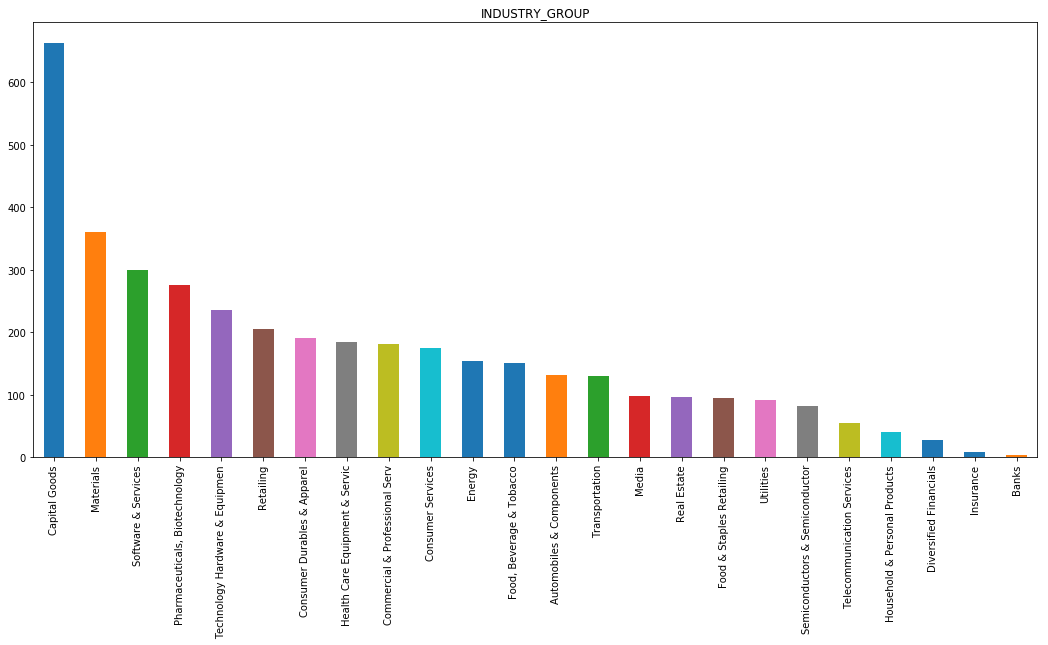

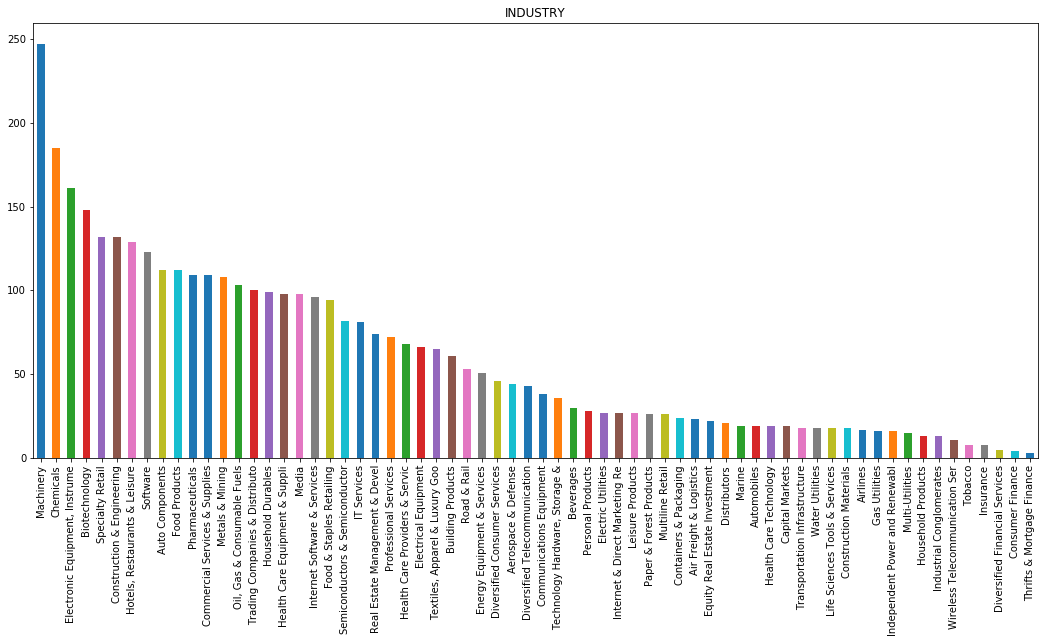

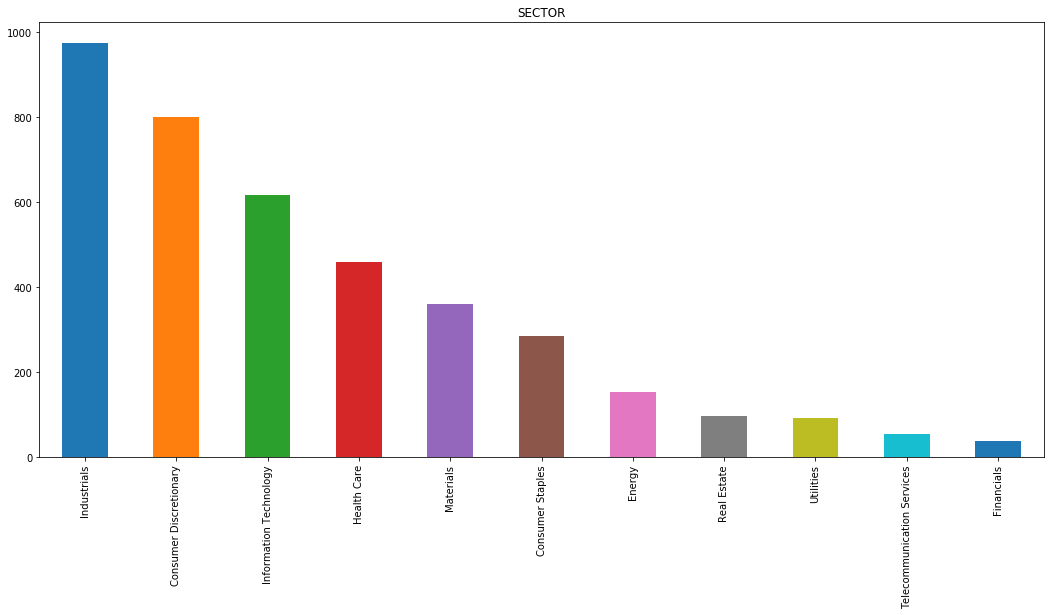

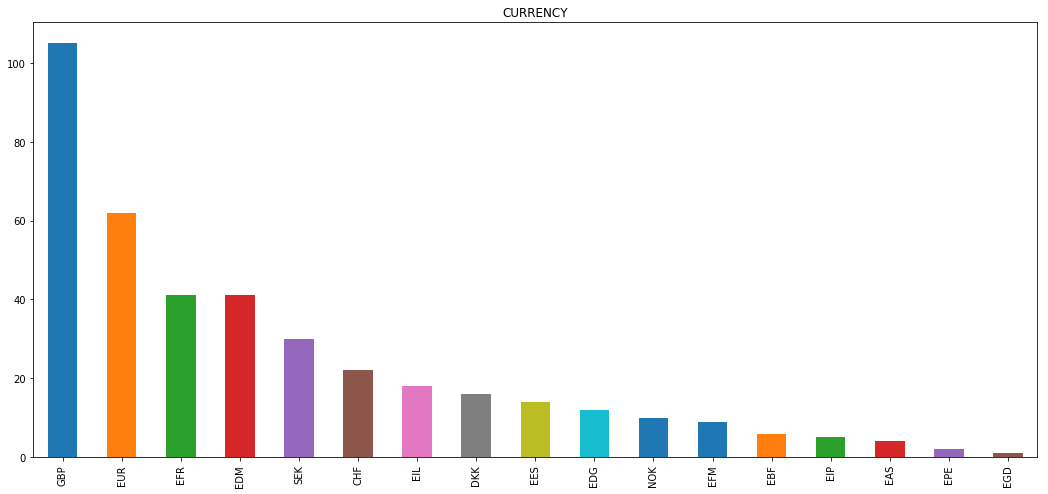

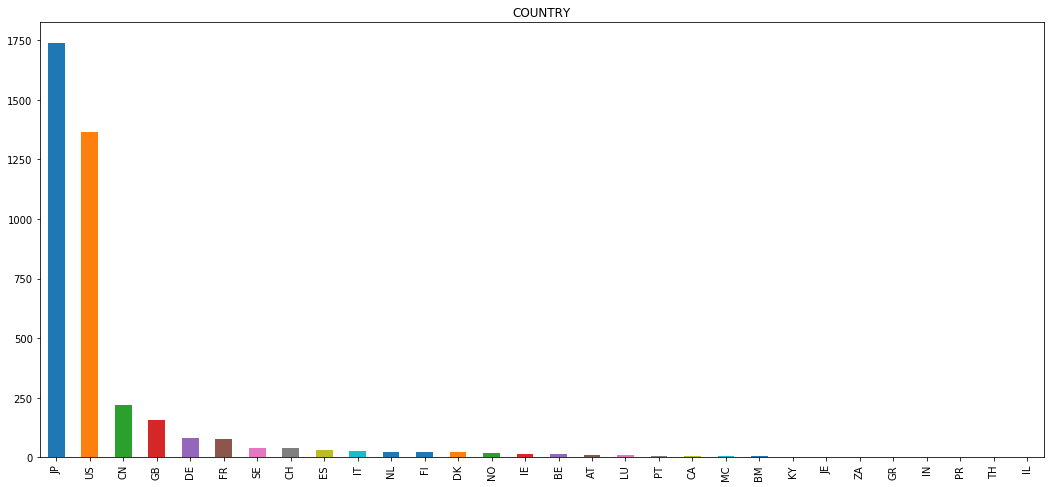

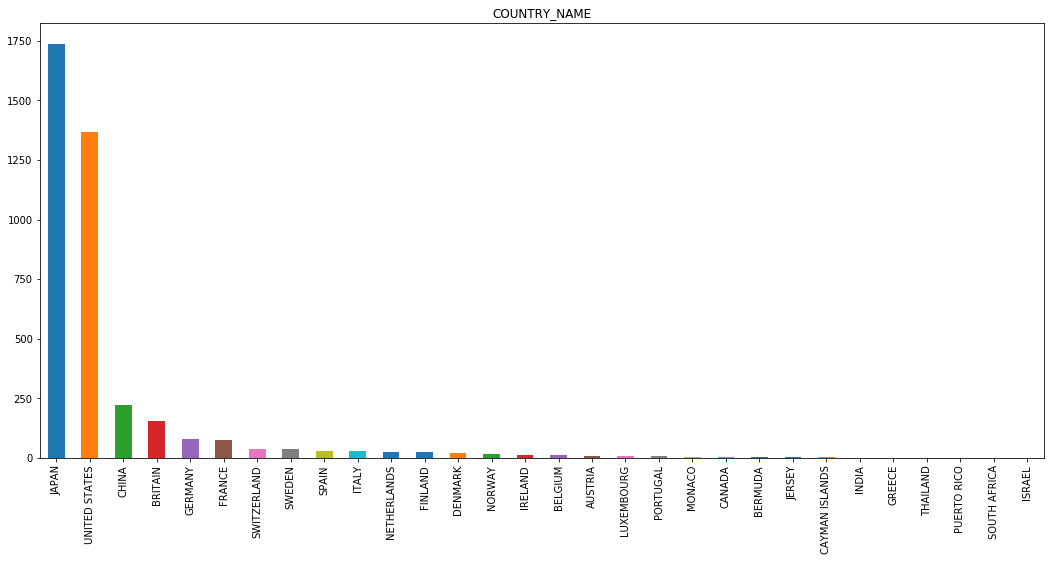

In [9]:
for col in colcategory:
    ax = data[col].value_counts().plot(kind='bar', figsize=(18, 8))
    ax.set_title(col)
    plt.show()

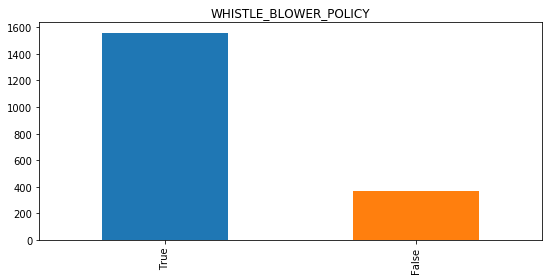

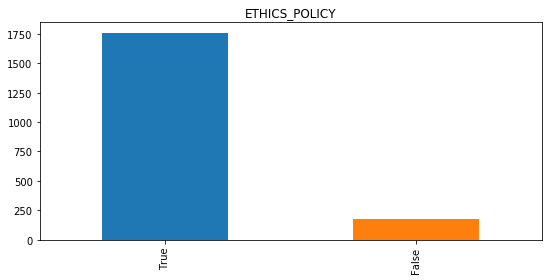

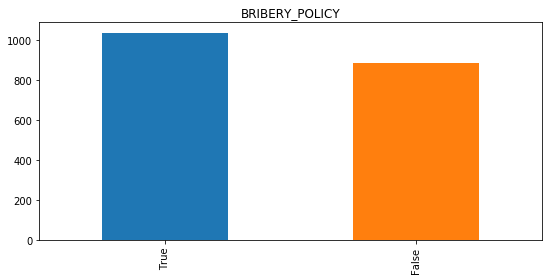

In [10]:
for col in colbool:
    ax = data[col].value_counts().plot(kind='bar', figsize=(9, 4))
    ax.set_title(col)
    plt.show()

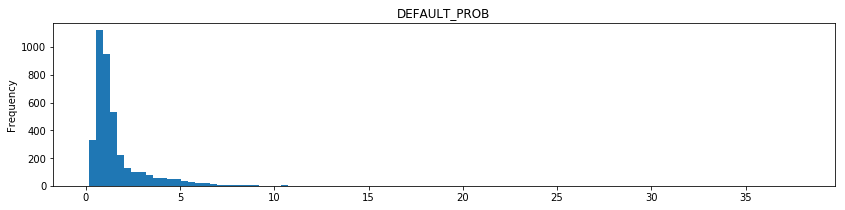

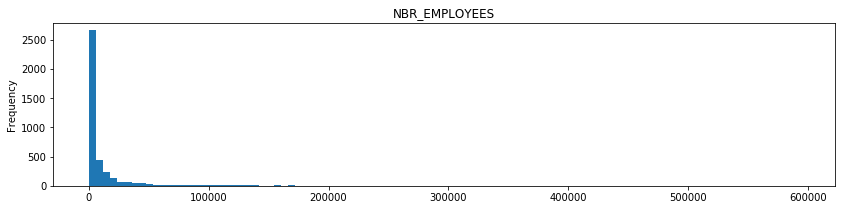

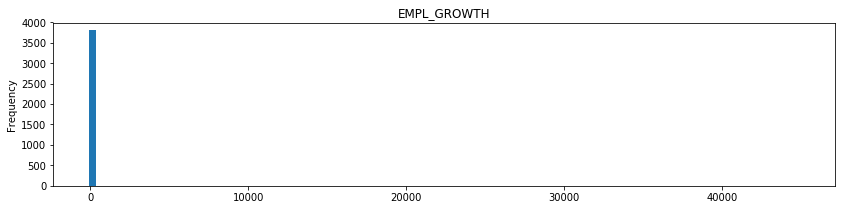

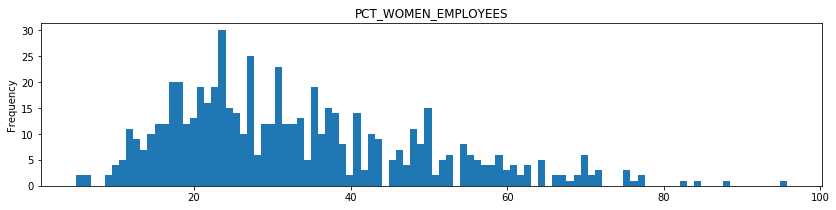

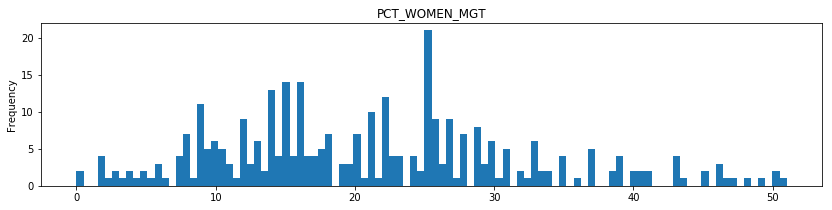

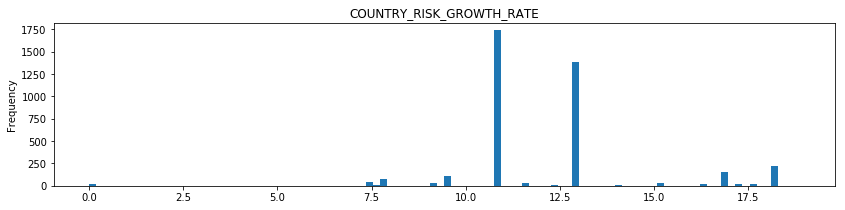

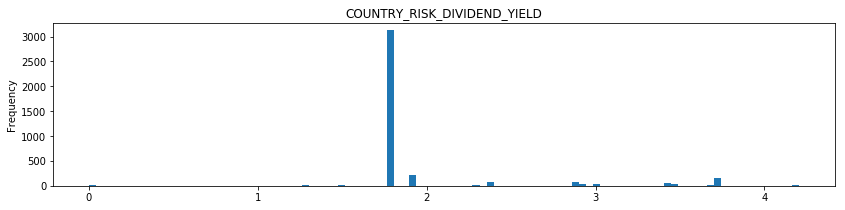

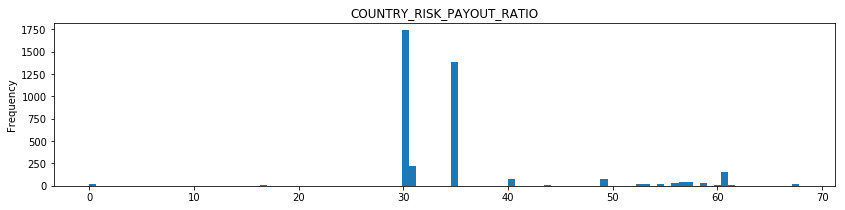

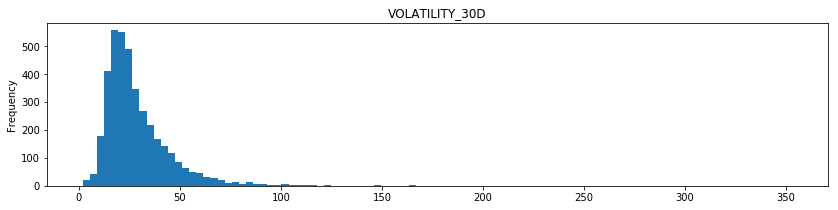

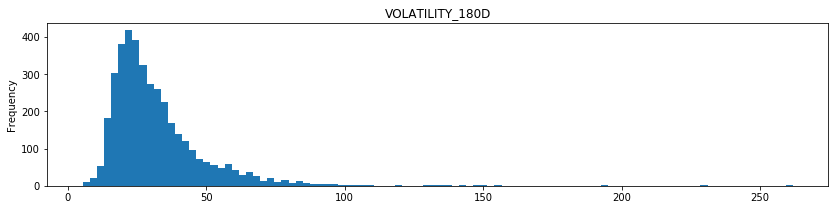

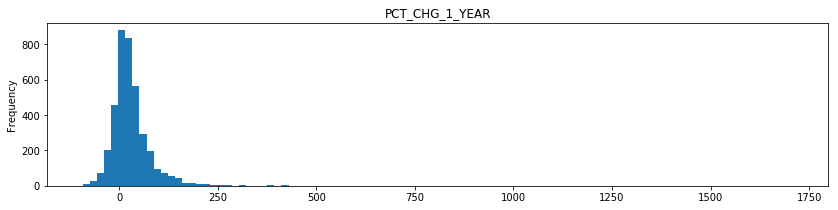

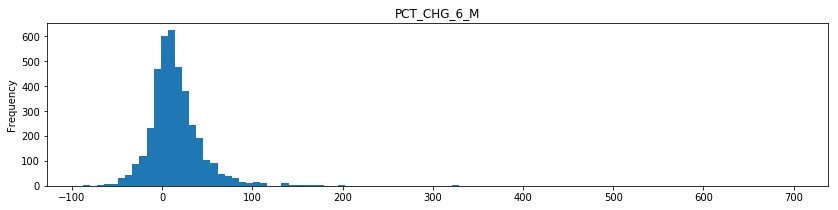

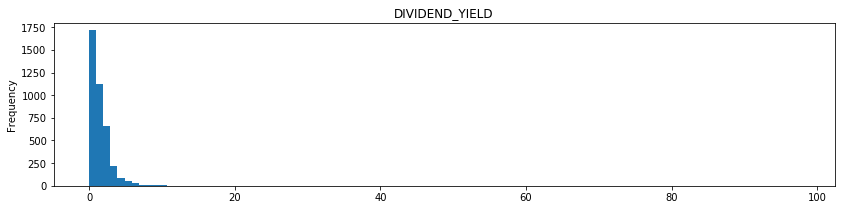

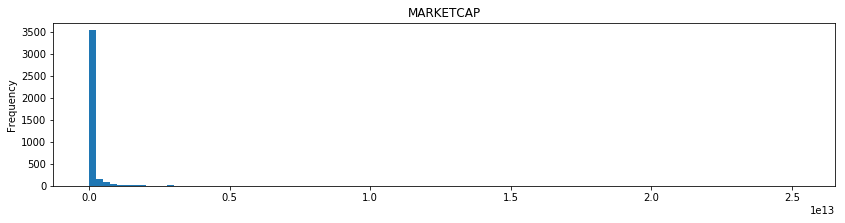

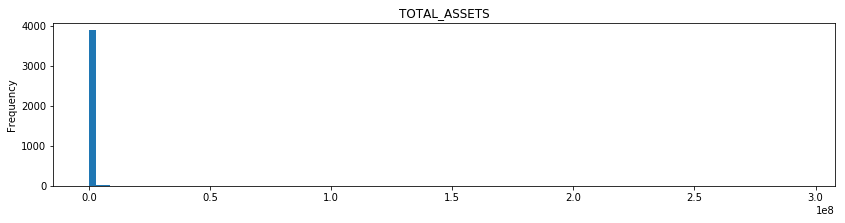

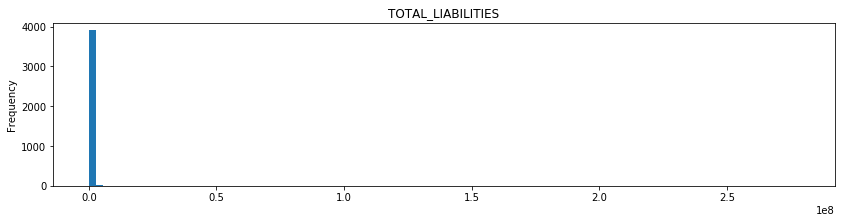

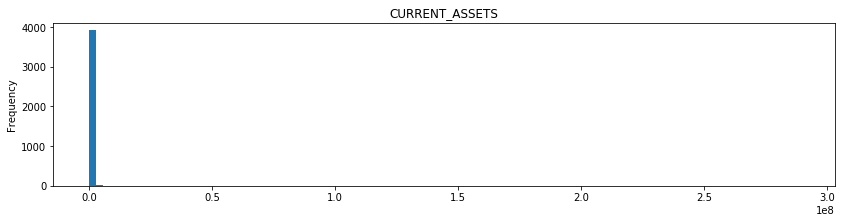

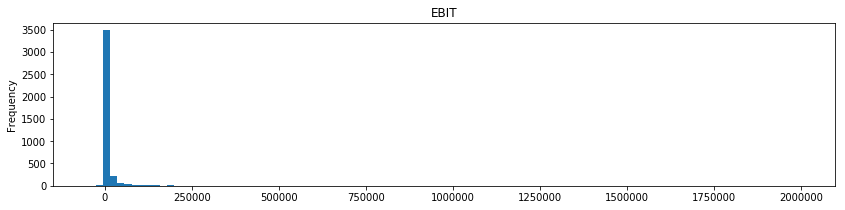

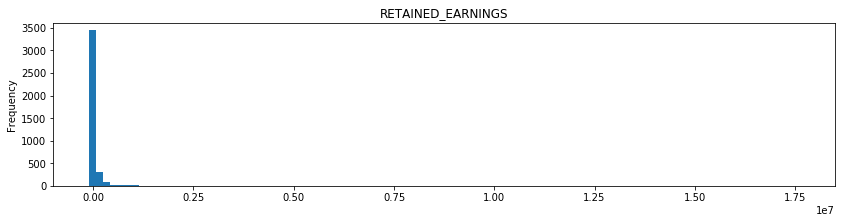

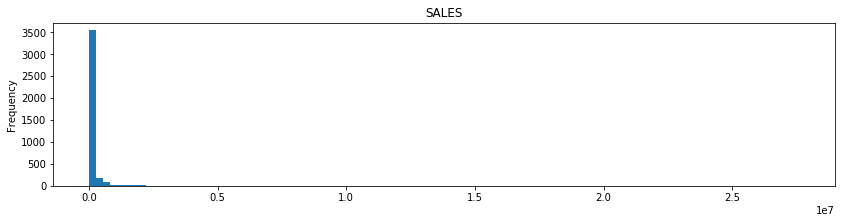

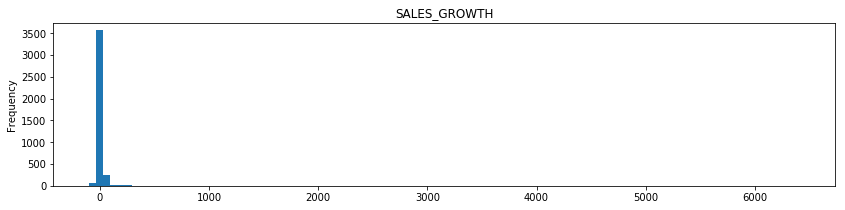

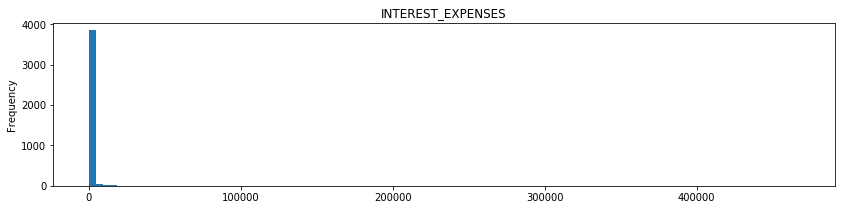

In [11]:
for col in colother:
    ax = data[col].plot(kind='hist', bins=100, figsize=(14, 3))
    ax.set_title(col)
    plt.show()